In [1]:
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('0050_new.csv')
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(150)
stocks_close = [float(line) for line in stocks['Close']] 
stocks_high = [float(line) for line in stocks['High']]   
stocks_low = [float(line) for line in stocks['Low']]     
rsv = []                                                 
Kpoint = [0]                                             
Dpoint = [0]                                             


for i in range(8, len(stocks_close)):
    low = min(stocks_low[i-8 : i+1])
    high = max(stocks_high[i-8 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

for i in range(0, len(rsv)):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))


for i in range(0, 7):
    Kpoint.insert(i, 0)
    Dpoint.insert(i, 0)


stocks_volume_red = []
stocks_volume_green = []

for i in range(0, len(stocks['Volume'])):
    if(stocks['Open'][i] < stocks['Close'][i]):
        stocks_volume_red.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_red.append(0)
    if(stocks['Open'][i] >= stocks['Close'][i]):
        stocks_volume_green.append(int(stocks['Volume'][i]))
    else:
        stocks_volume_green.append(0)


draw = [
        mpf.make_addplot(Kpoint, panel = 1, color = 'red', ylabel = 'KD'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'), 
        mpf.make_addplot(stocks_volume_red, type = 'bar', panel = 2, color = 'red', ylabel = 'Volume'),
        mpf.make_addplot(stocks_volume_green, type = 'bar', panel = 2, color = 'green')
       ]

color_1 = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)
style_1 = mpf.make_mpf_style(marketcolors = color_1)

kwargs = dict(type = 'candle', style = style_1, figscale = 3)

mpf.plot(stocks, **kwargs, addplot = draw, mav=(5, 10),panel_ratios = (4, 2, 2))
mpf.show()

FileNotFoundError: [Errno 2] File 0050_new.csv does not exist: '0050_new.csv'

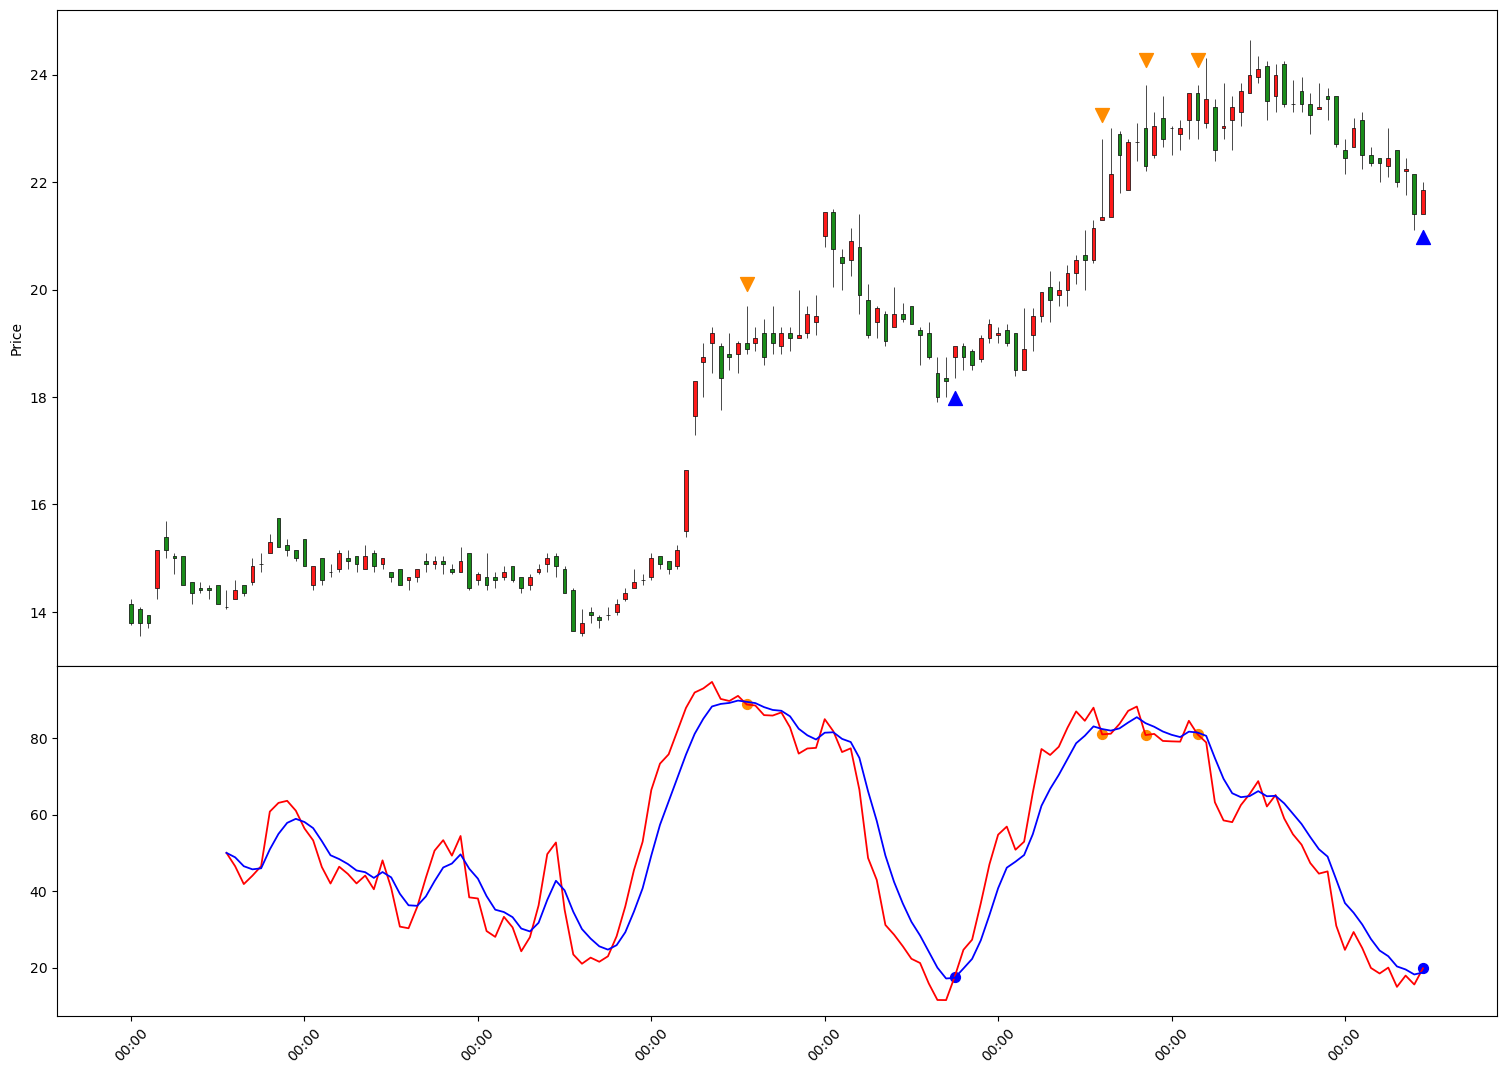

In [2]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocks_1312.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks.tail(150)

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2.5)


stocks_close = [float(line) for line in stocks['Close']] 
stocks_high = [float(line) for line in stocks['High']]   
stocks_low = [float(line) for line in stocks['Low']]     
rsv = []                                                 
Kpoint = [50]                                            
Dpoint = [50]                                            


for i in range(11, len(stocks['Date'])):
    low = min(stocks_low[i-11 : i+1])
    high = max(stocks_high[i-11 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))

for i in range(0, len(rsv) - 1):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i + 1] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))

for i in range(0, 11):
    Kpoint.insert(i, np.nan)
    Dpoint.insert(i, np.nan)


points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

p_buy = [np.nan] * len(stocks)
p_sell = [np.nan] * len(stocks)

for i in range(1, len(Kpoint)):

    if(Kpoint [i] < 20 and Kpoint[i - 1] < Dpoint[i - 1] and Kpoint[i] > Dpoint[i]):
        points_buy[i] = stocks_low[i] * 0.98
        p_buy[i] = Kpoint[i]

    elif(Kpoint [i] > 80 and Kpoint[i - 1] > Dpoint[i - 1] and Kpoint[i] < Dpoint[i]):
        points_sell[i] = stocks_high[i] * 1.02
        p_sell[i] = Kpoint[i]

draw = [
        mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 100, color = 'blue'),
        mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 100, color = 'darkorange'),
        mpf.make_addplot(Kpoint, panel = 1, color = 'red'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'),
        mpf.make_addplot(p_buy, type = 'scatter', panel = 1, color = 'blue', markersize = 50),
        mpf.make_addplot(p_sell, type = 'scatter', panel = 1, color = 'darkorange', markersize = 50)
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))